<a href="https://colab.research.google.com/github/leusto/ciencia_de_dados/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import dtreeviz.trees
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [34]:
dataset = pd.read_csv("https://raw.githubusercontent.com/leusto/Datasets_Livro_IntMineracaoDados/master/qualidade_servico.csv", sep = ";")

In [35]:
dataset.head()

,EP,QR,LE,R
0,MUITA,BOA,RUIM,Lucro
1,MUITA,BOA,BOA,Lucro
2,POUCA,BOA,BOA,Lucro
3,POUCA,OTIMA,RUIM,Prejuizo
4,POUCA,OTIMA,BOA,Prejuizo


In [37]:
dataset.shape

(8, 4)

In [62]:
X = dataset.iloc[:,[0,1,2]]
print(X)

      EP     QR    LE
0  MUITA    BOA  RUIM
1  MUITA    BOA   BOA
2  POUCA    BOA   BOA
3  POUCA  OTIMA  RUIM
4  POUCA  OTIMA   BOA
5  MUITA  OTIMA   BOA
6  MUITA  OTIMA  RUIM
7  POUCA    BOA  RUIM


In [55]:
y = dataset.iloc[:,[3]]
print(y)

          R
0     Lucro
1     Lucro
2     Lucro
3  Prejuizo
4  Prejuizo
5     Lucro
6  Prejuizo
7  Prejuizo


In [87]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [88]:
one_hot_data = pd.get_dummies(X[['EP','QR','LE']], drop_first=True)

In [89]:
clf = clf.fit(one_hot_data, y)

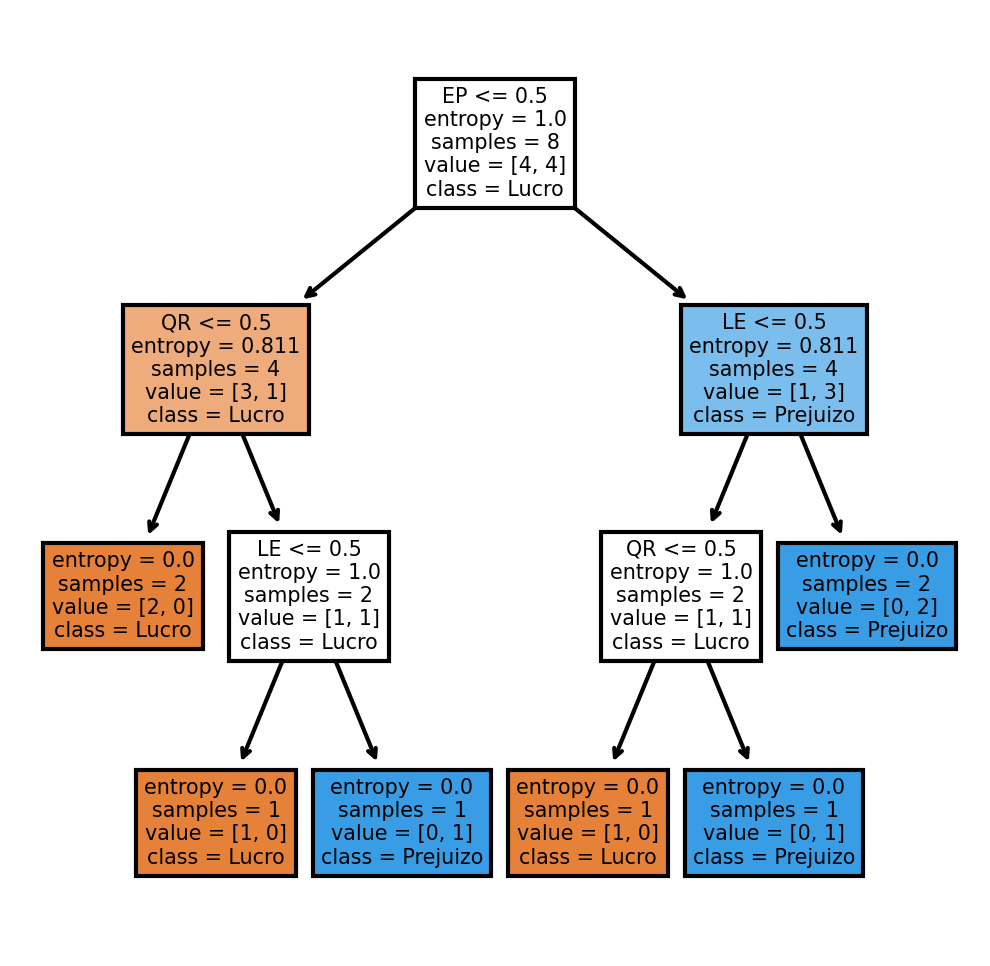

In [90]:
fn=['EP','QR','LE']
cn=['Lucro', 'Prejuizo']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [51]:
iris = load_iris()
X, y = iris.data, iris.target

In [54]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [91]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [6]:
clf = clf.fit(X, y)

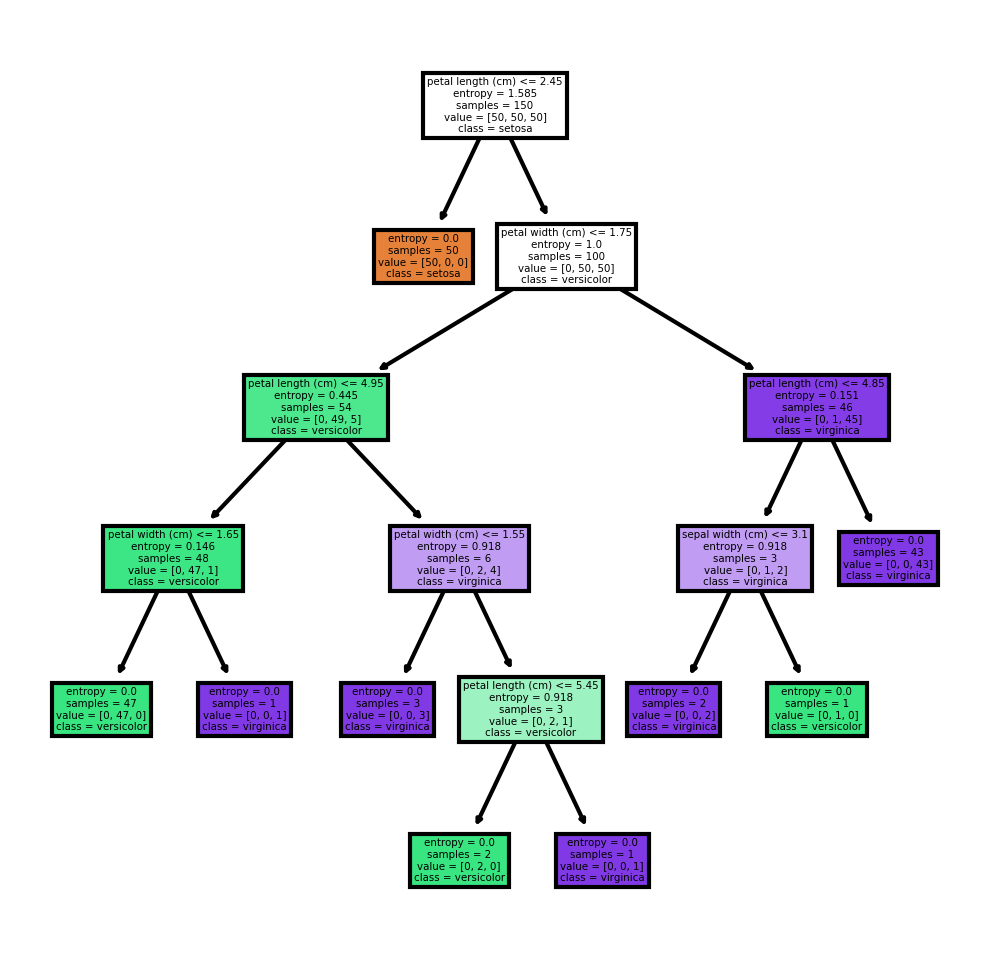

In [27]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

Text(0.5, 1.0, 'Feature Importance')

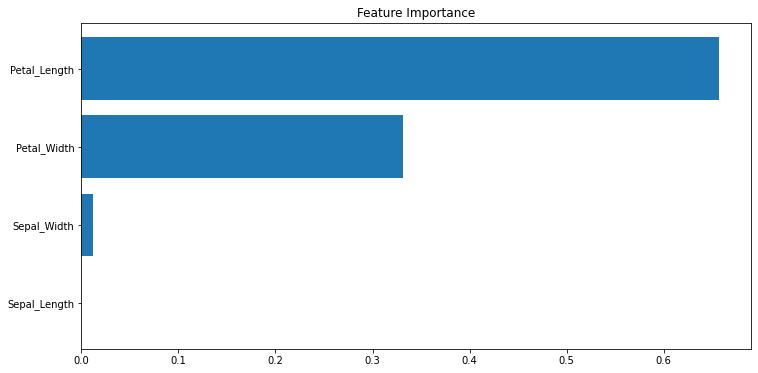

In [16]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])[sorted_idx])
plt.title('Feature Importance')

Referências

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-from-scikit-learn

https://medium.com/chinmaygaikwad/feature-importance-and-visualization-of-tree-models-d491e8198b0a

